In [6]:
import pandas as pd
from pathlib import Path

# Basisanalysen

In [7]:
input_data_folder = "../data/"
input_data_filename = "AAB_cleaned.csv"

In [8]:
data_file = Path(input_data_folder) / input_data_filename
df_cars = pd.read_csv(data_file, sep= "\t")  

# Variante für Google Colab
# df_cars = pd.read_csv( "https://raw.githubusercontent.com/SebastianZug/RoboLabVortraege/refs/heads/main/30_PythonAutomobile/project/data/AAB_cleaned.csv", sep= "\t")  

In [9]:
df_cars.head()

,Seite,Familienname,Vorname,Kennzeichen,Nummer,Beruf_Stand,Wohnort,Adresse,Fzg_Typ,Kreis_Stadt,Firma,id
0,103,Trautmann,Robert,S S,80,Privatmann,Arnstadt,Lindenallee 11,Lxw.,Arnstadt,-,17091280
1,420,Beckmann,Otto,I K,15,Molk.-Techniker,Breslau,N. Taschenstr. 25 a,KrR.,Provinz Schlesien,-,17101628
2,429,Barteczko,Karl,I K,439,Maschinist,Ratibor,Neuer Markt 5,KrR.,Provinz Schlesien,-,17101933
3,529,"Leesen, v.",-,I P,233,Ingenieur,St. Margarethen,-,KrR.,Schleswig-Holstein,-,17105384
4,2,-,-,A,73,-,Stadt Dessau,Franzstr. 30,LW.,Stadt Dessau,Berlin-Anh. Maschinenbau-Aktien-Gesellschaft,17088030


## Welche 20 Berufe sind bei den Haltern am häufigsten vertreten?

<Axes: xlabel='Beruf_Stand'>

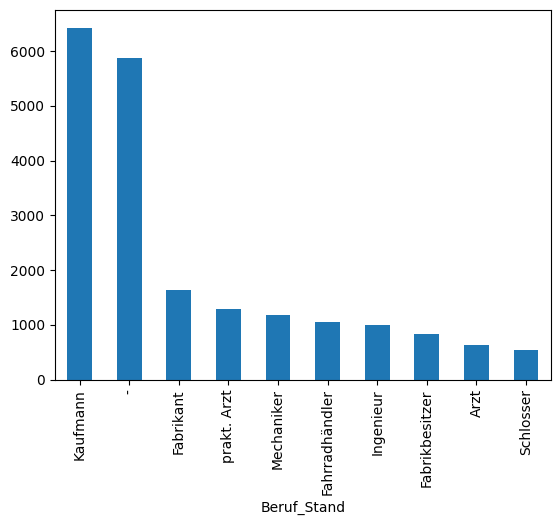

In [12]:
# gib mir die häufigsten Werte in der Spalte Beruf_Stand aus

df_cars["Beruf_Stand"].value_counts().head(10).plot(kind='bar')

> Welche Probeleme sehen Sie?

## Welche Typen von Kategorien von KfZ wurden genutzt?

https://wiki.genealogy.net/Deutsches_Automobil-Adre%C3%9Fbuch/Adressbuch_1909

| Abkürzung | Erläuterung                                                                         |
| --------- | ----------------------------------------------------------------------------------- |
| BW.       | Wagen zu Berufszwecken                                                              |
| DW.       | Wagen im öffentlichen Dienst                                                        |
| FW.       |                                                                                     |
| GW.       | Wagen zu Geschäftszwecken                                                           |
| KW.       |                                                                                     |
| KrR.      | Kraftrad                                                                            |
| KrW.      | Kraftwagen                                                                          |
| LW.       | Lastwagen                                                                           |
| LxW.      | Wagen für Luxus-, Vergnügungs- und Sportszwecke                                     |
| PW.       | Wagen der Fabriken und Händler für Probefahrten                                     |
| TW.       | Taxameterdroschken und alle sonstigen im öffentlichen Fuhrverkehr verwendeten Wagen |

In [13]:
df_cars.Fzg_Typ.value_counts()

Fzg_Typ
KrR.     21034
Lxw.     10483
GW.       3412
-         2979
BW.       2392
KrW.      2049
PW.       1294
LW.       1055
TW.        661
DW.         41
KW.         17
2LW.        12
2TW.         4
PR.          3
PrR.         2
FW.          2
2Lxw.        2
W.           2
(?)          1
6LW.         1
8LW.         1
WW.          1
KWR.         1
3TW.         1
9GW.         1
7TW.         1
3LW.         1
PrW.         1
2rW.         1
Name: count, dtype: int64

> Huch, hier scheint einiges im Argen zu liegen. Die Kategorien sind nicht einheitlich und es gibt viele Schreibfehler. Hier müssten wir erstmal Ordnung schaffen.

Trotzdem ganz interessant, dass es schon 1909 Taxameterdroschken gab. Wo war das?

In [14]:
df_cars[df_cars.Fzg_Typ == "TW."].Wohnort.value_counts().head(20)

Wohnort
München         178
Stuttgart        42
Hamburg          34
Breslau          30
Nürnberg         26
Düsseldorf       22
Hannover         17
Braunschweig     15
Cöln             13
Kiel             13
Berlin           10
Essen             9
Cannstatt         7
Duisburg          7
Bonn              6
Altenburg         6
-                 5
Dortmund          5
Pforzheim         5
Lübeck            5
Name: count, dtype: int64

## Und in Freiberg?

Welche Nutzungstypen von KfZ gab es in Freiberg? Und welche Berufe waren am häufigsten vertreten?

In [15]:
df_cars[df_cars.Wohnort == "Freiberg"].Fzg_Typ.value_counts()

Fzg_Typ
KrR.    38
KrW.     9
-        7
Name: count, dtype: int64

Offensichtlich war Freiberg eine Motoradstadt :-)